## 作业

1. 浮现上述代码。
2. 计算模型参数。
3. 使用不同大小的批次进行实验，观察模型收敛速度与收敛平稳性。
4. 使用不同大小的学习率进行实验，观察模型收敛速度与收敛平稳性。
5. 使用不同的激活函数进行实验，观察模型收敛速度与收敛平性能。
6. 尝试使用不同的参数初始化方法（如使用不同的正态分布、均匀分布、固定值等方法），观察模型收敛速度。
7. 思考如何改进模型以使得模型性能增强。
8. 思考如何给模型添加新的隐藏层并进行实验。

*说明：需对上述问题进行代码实现与结论总结*

1.代码实现（MNIST分类）

In [3]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

F:\Anaconda\envs\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
# 下载MNIST数据集并生成DataSet对象
# 使用OneHot编码处理标记
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


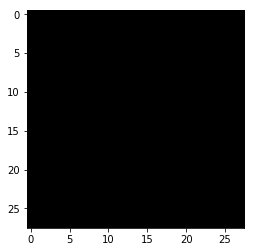

In [11]:
# 训练集图片矩阵，代表55000张图片，每张图片为一个向量，其长度为784
mnist.train.images.shape
# 训练集标记矩阵，代表55000张图片的标记，每张图片为一个10维的独热编码向量
mnist.train.labels.shape
# 可视化训练集中的图片
plt.imshow(Image.fromarray(mnist.train.images[0].reshape(28, 28)))


In [12]:
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 14.4170, acc 0.0895
step   500, loss 13.0831, acc 0.2278
step  1000, loss 11.0823, acc 0.3058
step  1500, loss 9.5701, acc 0.3501
step  2000, loss 10.0569, acc 0.3685
step  2500, loss 9.5701, acc 0.3918
step  3000, loss 10.4833, acc 0.4185
step  3500, loss 8.5657, acc 0.4311
step  4000, loss 7.1814, acc 0.4433
step  4500, loss 10.0564, acc 0.4494
step  5000, loss 10.5775, acc 0.4524
step  5500, loss 8.0534, acc 0.4578
step  6000, loss 8.0571, acc 0.4604
step  6500, loss 8.5627, acc 0.4604
step  7000, loss 9.0666, acc 0.4645
step  7500, loss 7.5554, acc 0.4651
step  8000, loss 8.5627, acc 0.4677
step  8500, loss 8.6460, acc 0.4654
step  9000, loss 8.0586, acc 0.4709
step  9500, loss 6.5480, acc 0.4682
step 10000, loss 11.0179, acc 0.4707
step 10500, loss 9.3627, acc 0.4707
step 11000, loss 5.0543, acc 0.4710
step 11500, loss 9.6109, acc 0.4717
step 12000, loss 6.6403, acc 0.4864
step 12500, loss 6.9172, acc 0.5315
step 13000, loss 9.0499, acc 0.5386
step 13500, loss 6.3

3. 使用不同大小的批次进行实验，观察模型收敛速度与收敛平稳性。

In [13]:
#batch_size为32
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 15.1106, acc 0.0741
step   500, loss 10.1695, acc 0.3694
step  1000, loss 5.6972, acc 0.4635
step  1500, loss 9.0665, acc 0.5054
step  2000, loss 6.7838, acc 0.5215
step  2500, loss 5.5212, acc 0.5431
step  3000, loss 4.2321, acc 0.5707
step  3500, loss 6.1932, acc 0.5945
step  4000, loss 8.0601, acc 0.6119
step  4500, loss 4.1117, acc 0.6170
step  5000, loss 6.0443, acc 0.6236
step  5500, loss 2.2253, acc 0.6265
step  6000, loss 10.6149, acc 0.6399
step  6500, loss 5.5426, acc 0.6359
step  7000, loss 4.8485, acc 0.6372
step  7500, loss 6.5473, acc 0.6430
step  8000, loss 6.5476, acc 0.6439
step  8500, loss 7.3296, acc 0.6456
step  9000, loss 4.5332, acc 0.6471
step  9500, loss 5.5421, acc 0.6448
step 10000, loss 4.9080, acc 0.6473
step 10500, loss 5.5778, acc 0.6530
step 11000, loss 5.4058, acc 0.6493
step 11500, loss 4.0317, acc 0.6541
step 12000, loss 4.4969, acc 0.6555
step 12500, loss 5.0406, acc 0.6534
step 13000, loss 4.3453, acc 0.6512
step 13500, loss 4.5335, 

In [14]:
#batch_size为64
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(64)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 64):
                batch_images, batch_labels = mnist.test.next_batch(64)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 14.2668, acc 0.1293
step   500, loss 11.9702, acc 0.2982
step  1000, loss 10.5203, acc 0.3733
step  1500, loss 10.5853, acc 0.4206
step  2000, loss 7.7107, acc 0.4420
step  2500, loss 8.8561, acc 0.4577
step  3000, loss 9.1410, acc 0.4911
step  3500, loss 7.9095, acc 0.5136
step  4000, loss 8.0744, acc 0.5273
step  4500, loss 7.5194, acc 0.5588
step  5000, loss 6.6604, acc 0.6046
step  5500, loss 7.3150, acc 0.6210
step  6000, loss 7.1834, acc 0.6229
step  6500, loss 5.4105, acc 0.6344
step  7000, loss 6.6820, acc 0.6366
step  7500, loss 6.7337, acc 0.6535
step  8000, loss 4.7851, acc 0.6891
step  8500, loss 3.7563, acc 0.6996
step  9000, loss 4.4105, acc 0.7186
step  9500, loss 3.7313, acc 0.7231
step 10000, loss 4.6536, acc 0.7285
step 10500, loss 3.3384, acc 0.7377
step 11000, loss 3.4381, acc 0.7780
step 11500, loss 1.7726, acc 0.7915
step 12000, loss 2.0170, acc 0.8069
step 12500, loss 2.5233, acc 0.8114
step 13000, loss 1.8826, acc 0.8160
step 13500, loss 2.8268,

3.结论：当batch_size从32变为64，则收敛速度加快，并且最终正确率得到提升

4. 使用不同大小的学习率进行实验，观察模型收敛速度与收敛平稳性。

In [15]:
#学习率为0.01
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 13.9661, acc 0.1054
step   500, loss 11.8590, acc 0.3041
step  1000, loss 9.3819, acc 0.4006
step  1500, loss 6.5480, acc 0.4610
step  2000, loss 7.3277, acc 0.4999
step  2500, loss 8.8116, acc 0.5043
step  3000, loss 8.7321, acc 0.5187
step  3500, loss 7.2510, acc 0.5256
step  4000, loss 7.0707, acc 0.5240
step  4500, loss 8.5539, acc 0.5407
step  5000, loss 7.5545, acc 0.5365
step  5500, loss 9.5701, acc 0.5440
step  6000, loss 7.5552, acc 0.5402
step  6500, loss 7.2045, acc 0.5450
step  7000, loss 6.0833, acc 0.5487
step  7500, loss 6.3333, acc 0.5460
step  8000, loss 9.3541, acc 0.5468
step  8500, loss 6.3944, acc 0.5486
step  9000, loss 7.5577, acc 0.5523
step  9500, loss 6.7639, acc 0.5522
step 10000, loss 10.3935, acc 0.5542
step 10500, loss 6.5524, acc 0.5529
step 11000, loss 6.5481, acc 0.5583
step 11500, loss 8.8428, acc 0.5535
step 12000, loss 5.0446, acc 0.5588
step 12500, loss 7.0517, acc 0.5578
step 13000, loss 10.0738, acc 0.5545
step 13500, loss 7.0517,

In [16]:
#学习率为0.1
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 12.1040, acc 0.1081
step   500, loss 7.0517, acc 0.6029
step  1000, loss 7.0544, acc 0.6320
step  1500, loss 4.5154, acc 0.6529
step  2000, loss 4.0294, acc 0.6661
step  2500, loss 3.0221, acc 0.7278
step  3000, loss 5.0369, acc 0.7292
step  3500, loss 2.8108, acc 0.7396
step  4000, loss 3.1531, acc 0.7330
step  4500, loss 4.1733, acc 0.7469
step  5000, loss 4.0296, acc 0.7394
step  5500, loss 3.3815, acc 0.7449
step  6000, loss 3.0237, acc 0.7453
step  6500, loss 4.0295, acc 0.7530
step  7000, loss 2.5185, acc 0.7513
step  7500, loss 2.5185, acc 0.7546
step  8000, loss 5.0369, acc 0.7492
step  8500, loss 2.5185, acc 0.7537
step  9000, loss 5.5414, acc 0.7599
step  9500, loss 3.5258, acc 0.7576
step 10000, loss 1.5111, acc 0.7594
step 10500, loss 5.5462, acc 0.7545
step 11000, loss 5.8735, acc 0.7576
step 11500, loss 1.5111, acc 0.7621
step 12000, loss 3.1125, acc 0.7570
step 12500, loss 2.5079, acc 0.8460
step 13000, loss 0.2851, acc 0.8523
step 13500, loss 1.5111, ac

4.结论：使用了0.01和0.1的学习率来训练模型，
学习率为0.1的收敛速度明显提升，但收敛平稳性略显下降

5. 使用不同的激活函数进行实验，观察模型收敛速度与收敛平性能。

In [18]:
#激活函数为relu
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 14.6317, acc 0.1046
step   500, loss 10.4235, acc 0.3019
step  1000, loss 11.7152, acc 0.3626
step  1500, loss 10.0738, acc 0.4872
step  2000, loss 7.0513, acc 0.5648
step  2500, loss 7.8593, acc 0.6031
step  3000, loss 4.2247, acc 0.6453
step  3500, loss 4.8906, acc 0.6852
step  4000, loss 5.0369, acc 0.6949
step  4500, loss 4.9454, acc 0.7067
step  5000, loss 3.6370, acc 0.7072
step  5500, loss 5.0411, acc 0.7220
step  6000, loss 3.5254, acc 0.7232
step  6500, loss 4.5332, acc 0.7267
step  7000, loss 5.3793, acc 0.7386
step  7500, loss 3.0707, acc 0.7394
step  8000, loss 2.5424, acc 0.7543
step  8500, loss 3.7666, acc 0.7689
step  9000, loss 2.5706, acc 0.7780
step  9500, loss 4.4105, acc 0.7907
step 10000, loss 2.3650, acc 0.7840
step 10500, loss 4.5298, acc 0.7945
step 11000, loss 2.4895, acc 0.7988
step 11500, loss 1.0112, acc 0.8040
step 12000, loss 1.5270, acc 0.8058
step 12500, loss 3.3103, acc 0.8103
step 13000, loss 2.6404, acc 0.8110
step 13500, loss 3.4979,

In [19]:
#激活函数为tf.nn.tanh

with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.tanh(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 13.1870, acc 0.0816
step   500, loss 7.3429, acc 0.3044
step  1000, loss 3.8472, acc 0.4721
step  1500, loss 2.3034, acc 0.5868
step  2000, loss 3.0390, acc 0.6491
step  2500, loss 1.8143, acc 0.6841
step  3000, loss 2.5013, acc 0.7071
step  3500, loss 0.6426, acc 0.7300
step  4000, loss 1.5636, acc 0.7415
step  4500, loss 2.6909, acc 0.7621
step  5000, loss 0.9137, acc 0.7625
step  5500, loss 2.3269, acc 0.7802
step  6000, loss 0.8176, acc 0.7855
step  6500, loss 2.2837, acc 0.7861
step  7000, loss 0.6108, acc 0.7965
step  7500, loss 1.0500, acc 0.8040
step  8000, loss 0.5499, acc 0.8015
step  8500, loss 1.2555, acc 0.8068
step  9000, loss 0.6654, acc 0.8088
step  9500, loss 0.2706, acc 0.8185
step 10000, loss 0.0811, acc 0.8217
step 10500, loss 1.1363, acc 0.8175
step 11000, loss 0.9602, acc 0.8237
step 11500, loss 1.2236, acc 0.8253
step 12000, loss 0.9316, acc 0.8329
step 12500, loss 0.4959, acc 0.8309
step 13000, loss 0.9986, acc 0.8306
step 13500, loss 0.4243, ac

5.结论：使用relu和tanh激活函数，
tanh函数的正确率较高、收敛速度较快，两者收敛平稳性较为相似

In [21]:
#初始化方法：tf.random_normal

with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.tanh(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 13.4218, acc 0.0660
step   500, loss 8.9105, acc 0.3186
step  1000, loss 3.3918, acc 0.5064
step  1500, loss 2.4479, acc 0.6063
step  2000, loss 4.0888, acc 0.6577
step  2500, loss 1.9058, acc 0.7046
step  3000, loss 1.9316, acc 0.7185
step  3500, loss 2.2577, acc 0.7472
step  4000, loss 2.2516, acc 0.7611
step  4500, loss 1.9170, acc 0.7698
step  5000, loss 2.2147, acc 0.7787
step  5500, loss 0.9159, acc 0.7905
step  6000, loss 1.1494, acc 0.7893
step  6500, loss 2.0744, acc 0.7968
step  7000, loss 1.2171, acc 0.8159
step  7500, loss 1.0581, acc 0.8061
step  8000, loss 1.7011, acc 0.8181
step  8500, loss 1.1535, acc 0.8192
step  9000, loss 1.1348, acc 0.8213
step  9500, loss 0.8890, acc 0.8264
step 10000, loss 0.5943, acc 0.8276
step 10500, loss 0.1172, acc 0.8303
step 11000, loss 1.1813, acc 0.8361
step 11500, loss 1.2585, acc 0.8348
step 12000, loss 1.7443, acc 0.8400
step 12500, loss 0.0216, acc 0.8379
step 13000, loss 1.6406, acc 0.8421
step 13500, loss 1.5163, ac

In [22]:
#初始化方法：tf.random_uniform

with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.tanh(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_uniform([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 5.7949, acc 0.0988
step   500, loss 0.9616, acc 0.5694
step  1000, loss 0.8580, acc 0.6836
step  1500, loss 0.8155, acc 0.7275
step  2000, loss 0.5358, acc 0.7626
step  2500, loss 0.5651, acc 0.7824
step  3000, loss 0.6623, acc 0.7970
step  3500, loss 0.3869, acc 0.8071
step  4000, loss 0.2336, acc 0.8208
step  4500, loss 0.7068, acc 0.8191
step  5000, loss 0.6389, acc 0.8344
step  5500, loss 0.7569, acc 0.8374
step  6000, loss 0.3758, acc 0.8423
step  6500, loss 0.7103, acc 0.8404
step  7000, loss 0.6423, acc 0.8555
step  7500, loss 0.5172, acc 0.8464
step  8000, loss 0.7198, acc 0.8603
step  8500, loss 0.2785, acc 0.8541
step  9000, loss 0.6217, acc 0.8638
step  9500, loss 0.4634, acc 0.8579
step 10000, loss 0.4097, acc 0.8647
step 10500, loss 0.5834, acc 0.8635
step 11000, loss 0.7521, acc 0.8649
step 11500, loss 0.4980, acc 0.8693
step 12000, loss 0.5040, acc 0.8658
step 12500, loss 0.2518, acc 0.8746
step 13000, loss 0.2739, acc 0.8706
step 13500, loss 0.5052, acc

6.使用tf.random_normal和tf.random_uniform两种不同的初始化方法
使用tf.random_uniform比tf.random_normal的正确率高，且收敛效果更平稳

In [ ]:
7. 思考如何改进模型以使得模型性能增强。
可以变化批次，学习率，激活函数，初始化方法，改变不同的组合方式，
找到使模型性能达到最优的组合

In [ ]:
8. 思考如何给模型添加新的隐藏层并进行实验。